In [3]:
import mne
from mne.datasets import sample
from mne import io
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.preprocessing import ICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#from MNE tutorial
#data_path = sample.data_path()
#raw_fname= data_path + '/MEG/sample/sample_audvis_raw.fif'
#raw = mne.io.read_raw_fif(raw_fname, preload=True)

In [5]:
#(raw.copy().pick_types(meg='mag')
#           .del_proj(0)
#           .plot(duration=60, n_channels=100, remove_dc=False))


In [12]:
#now trying to import kai's test data
ROOT = '/home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_raw/'
raw_file=ROOT+'sub44_alpha_study_pilot.bdf' #"kai-test-2.bdf"
raw=mne.io.read_raw_edf(raw_file,preload=True)

Extracting EDF parameters from /home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_raw/sub44_alpha_study_pilot.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-12-13d3151e8a12>:4: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raw=mne.io.read_raw_edf(raw_file,preload=True)


Reading 0 ... 3262463  =      0.000 ...  6371.998 secs...


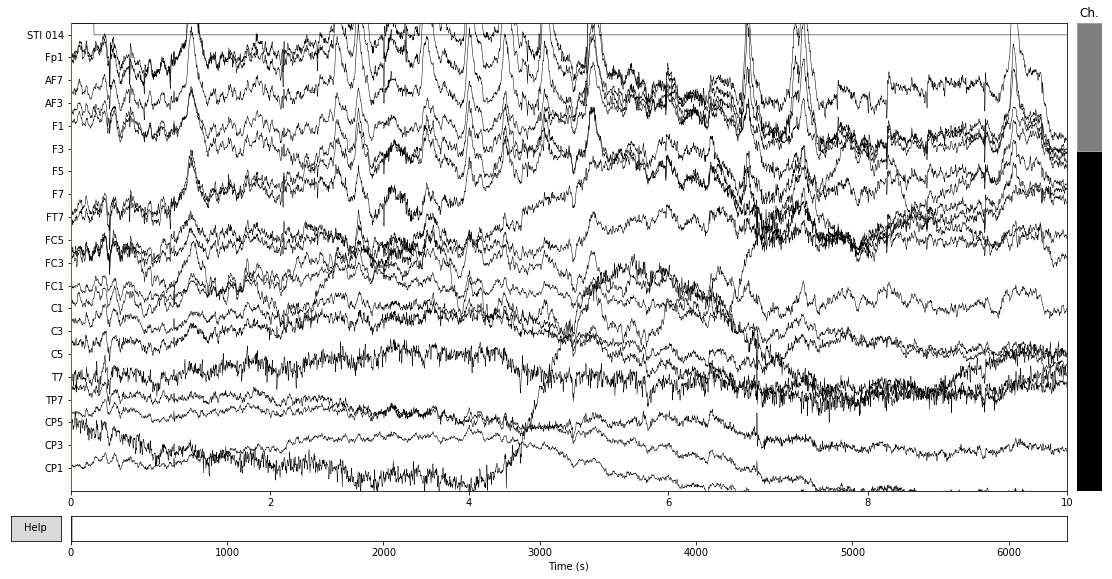

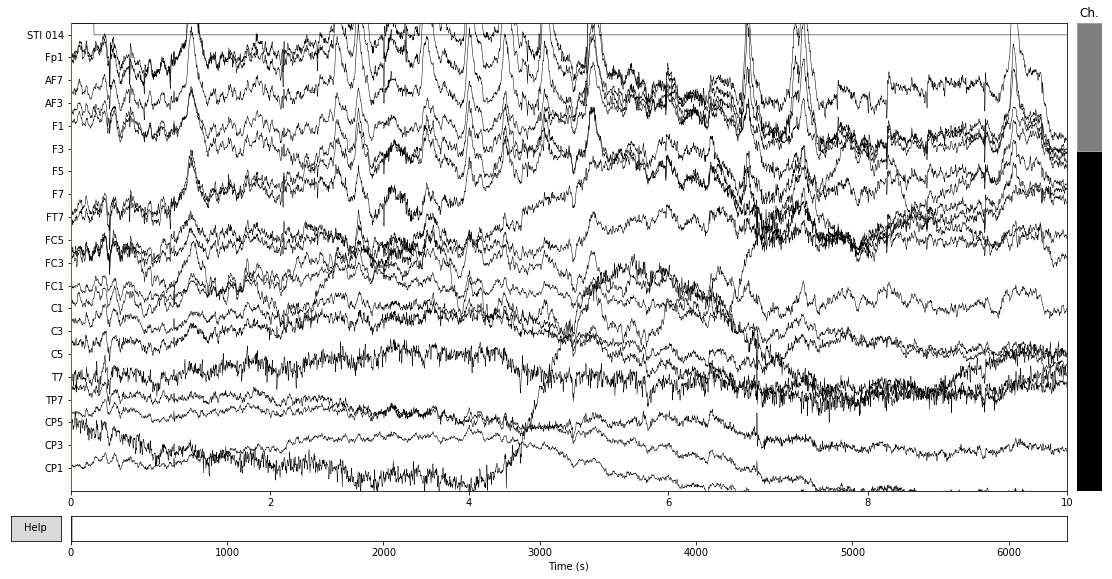

In [13]:
raw.plot()

# Filtering and re-referencing

Setting up band-pass filter from 1 - 50 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 1691 samples (3.303 sec) selected


/data/backed_up/anaconda2/lib/python2.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


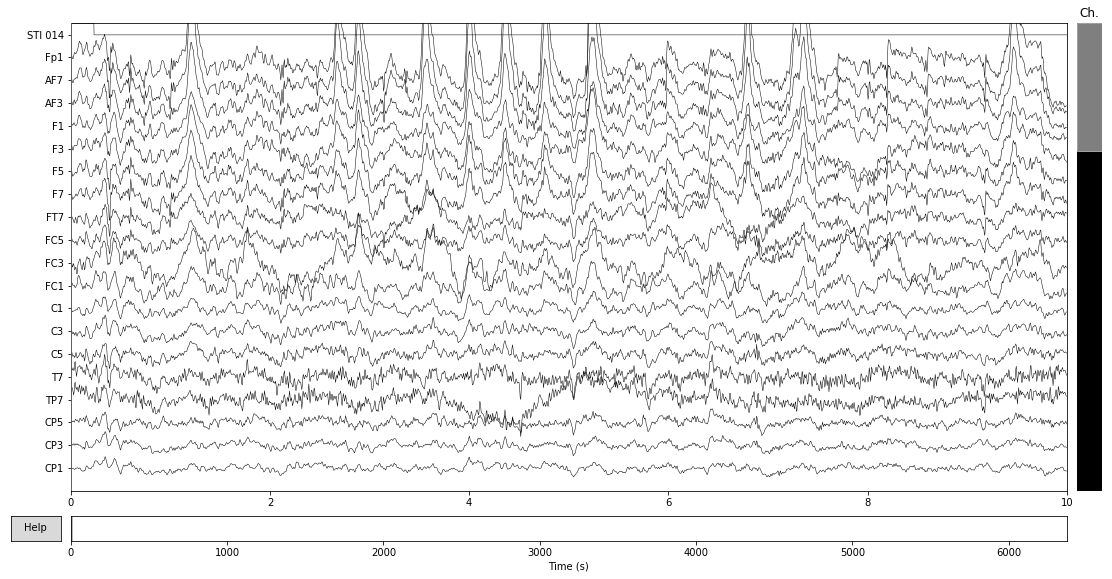

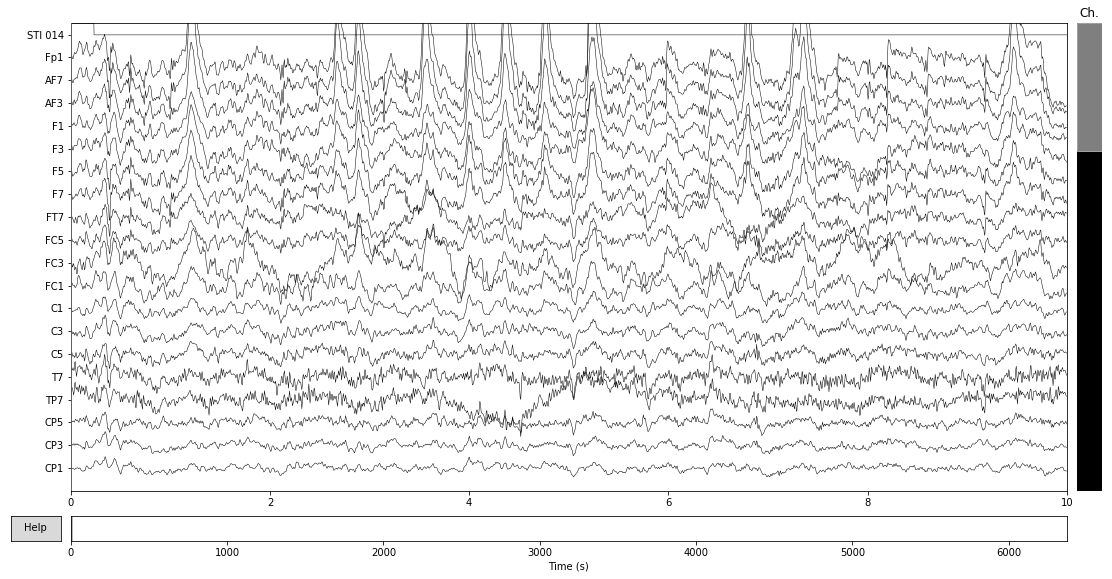

In [14]:
raw_f=raw.copy()
raw_f.filter(1,50)
raw_f.plot()

In [15]:
raw_fr=raw_f.copy()
raw_fr, r2 = mne.set_eeg_reference(raw_fr,ref_channels=['EXG1','EXG2'])

Applying a custom EEG reference.


<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, ...
    chs : list | 73 items (EEG: 72, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | True
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 50.0 Hz
    meas_date : tuple | 2018-12-06 13:56:42 GMT
    nchan : int | 73
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layo

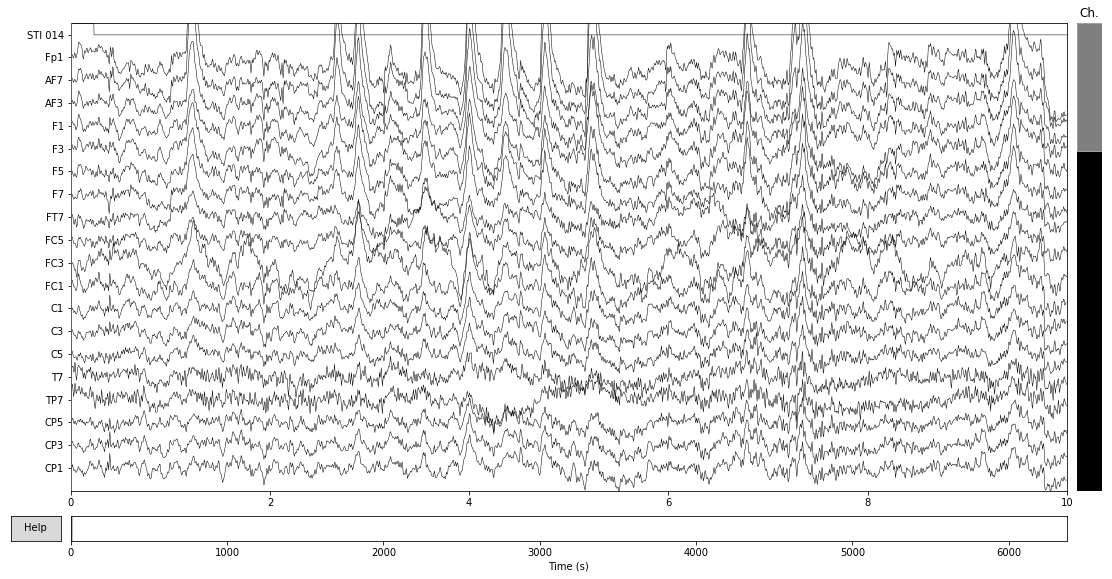

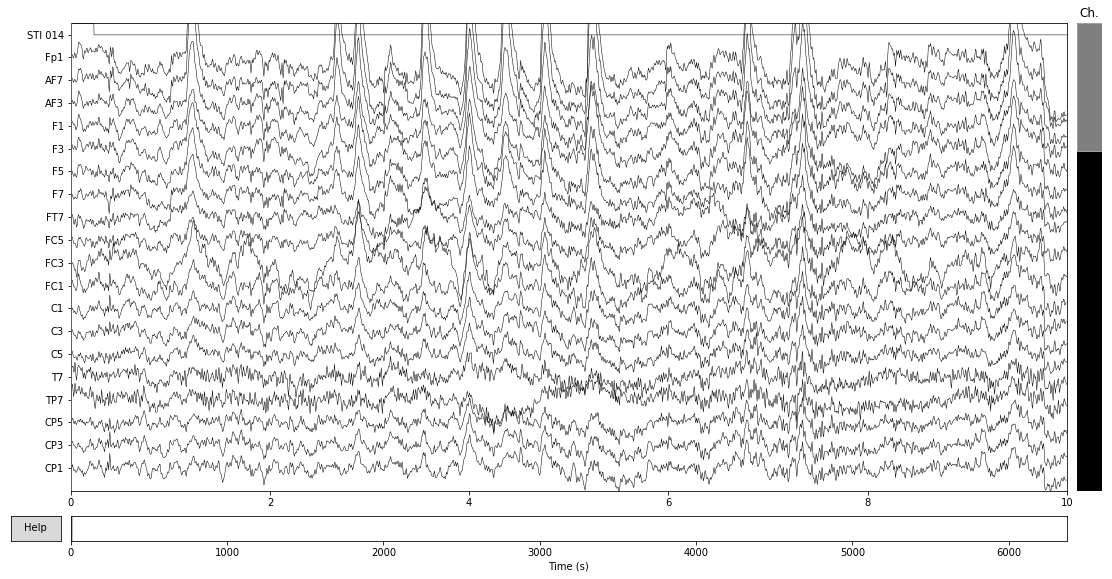

In [16]:
print(raw_fr.info)
raw_fr.plot()

# Defining Events


In [17]:
events = mne.find_events(raw, verbose=True)


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
2564 events found
Event IDs: [  105   107   109   117   125   127   131   133   254 65790]


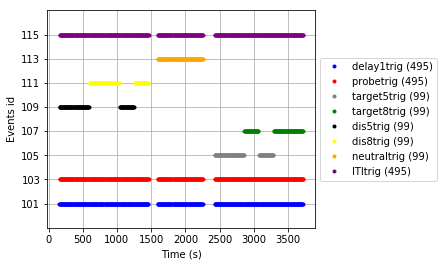

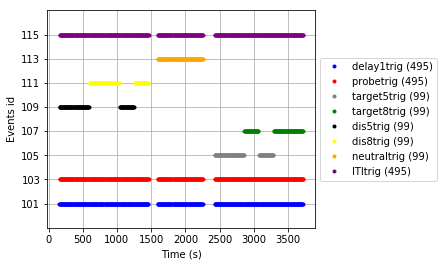

In [11]:
event_id = {'delay1trig':101,'probetrig':103,
            'target5trig':105,'target8trig':107,
            'dis5trig':109,'dis8trig':111,
            'neutraltrig':113,'ITItrig':115}
color= {101:'blue',103:'red',105:'grey',107:'green',
        109:'black',111:'yellow',113:'orange',115:'purple'}
mne.viz.plot_events(events,raw.info['sfreq'],raw.first_samp,color=color,event_id=event_id)


In [12]:
event_id_t5 = {'target5trig':105}#,'target8trig':107} 
tmin, tmax = -0.5, 2  #dont remember the window, making this up
baseline = (None, 0.0)
epochs_tar5 = mne.Epochs(raw_fr, baseline=baseline, events=events, event_id=event_id_t5, tmin=tmin,
                    tmax=tmax)

99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [13]:
#epochs_tar5.plot(block=True)

In [14]:
epochs_tar5.info


<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, ...
    chs : list | 73 items (EEG: 72, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | True
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 50.0 Hz
    meas_date : tuple | 2018-10-12 10:48:59 GMT
    nchan : int | 73
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layo

# ICA

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-15-b3395870871b>:4: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
  raw_fr.set_montage(layout)


Selection by number: 25 components
Fitting ICA took 23.0s.


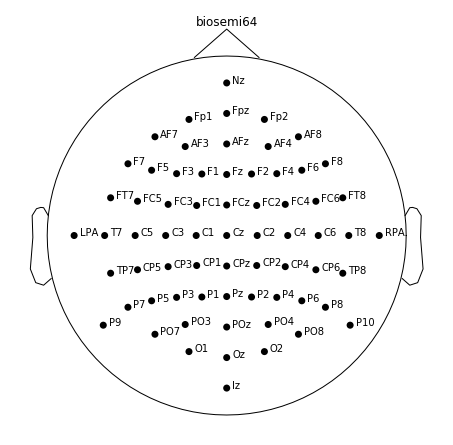

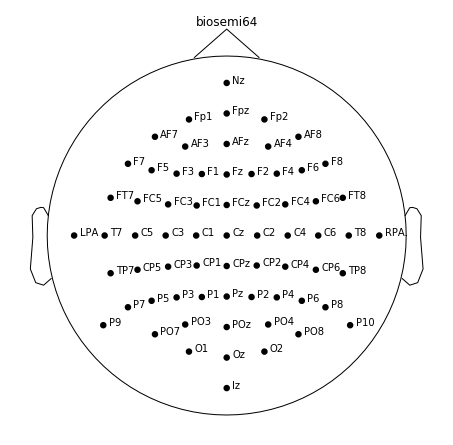

In [15]:
our_picks=mne.pick_types(raw_fr.info,meg=False,eeg=True,eog=False,exclude=['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'])
#layout=mne.channels.read_layout(kind='biosemi64.lout', path='/home/dcellier/AlphaStudy_Analysis')
layout=mne.channels.read_montage('biosemi64')
raw_fr.set_montage(layout)
ica = ICA(n_components=25,random_state=25)
ica.fit(raw_fr,picks=our_picks)
layout.plot()

In [20]:
#ica.plot_components(cmap='PiYG_r')
ica.info['bads']=[1]
ica.exclude

[]

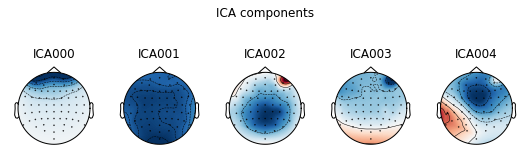

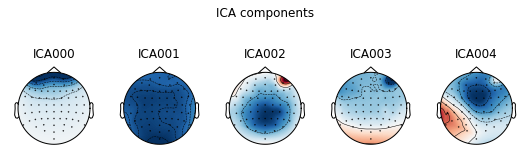

In [17]:
ica.plot_components(picks=range(5),inst=raw_fr)


# EOG artifact detection

In [17]:
eog_epochs_3=create_eog_epochs(raw_fr,ch_name='EXG3',reject_by_annotation=False)
eog_inds3,scores=ica.find_bads_eog(eog_epochs_3,ch_name='EXG3')
eog_epochs_4=create_eog_epochs(raw_fr,ch_name='EXG4',reject_by_annotation=False)
eog_inds4,scores=ica.find_bads_eog(eog_epochs_4,ch_name='EXG4')
eog_epochs_5=create_eog_epochs(raw_fr,ch_name='EXG5',reject_by_annotation=False)
eog_inds5,scores=ica.find_bads_eog(eog_epochs_5,ch_name='EXG5')
eog_epochs_6=create_eog_epochs(raw_fr,ch_name='EXG6',reject_by_annotation=False)
eog_inds6,scores=ica.find_bads_eog(eog_epochs_6,ch_name='EXG6')

Using channel EXG3 as EOG channel
EOG channel index for this subject is: [66]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 2 - 45 Hz
Filter length of 8192 samples (16.000 sec) selected
Setting up band-pass filter from 1 - 10 Hz
Filter length of 8192 samples (16.000 sec) selected
Now detecting blinks and generating corresponding events
Number of EOG events detected : 80
80 matching events found
No baseline correction applied
Not setting metadata
Loading data for 80 events and 513 original time points ...
2 bad epochs dropped
Using channel EXG3 as EOG channel
Using channel EXG4 as EOG channel
EOG channel index for this subject is: [67]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 2 - 45 Hz
Filter length of 8192 samples (16.000 sec) selected
Setting up band-pass filter from 1 - 10 Hz
Filter length of 8192 samples (16.000 sec) selected
Now detecting blinks

In [18]:
eog_inds3

[5]

In [19]:
scores

array([ 6.43964256e-01, -1.88759849e-01,  2.46129444e-02, -2.29036895e-01,
       -7.96639884e-02, -3.60788544e-01, -1.93024824e-01, -3.53386555e-04,
        3.04456598e-03,  4.41587440e-02,  8.87324890e-03, -2.93989471e-02,
        3.76846180e-03, -1.97678504e-02, -2.94777996e-02,  9.64869519e-02,
       -3.80981497e-03,  8.19895668e-02,  4.90439085e-02, -2.91230168e-02,
        1.72833055e-02, -3.65324820e-04,  4.60587614e-02,  5.54539864e-02,
        2.78509248e-02])

In [20]:
eog_inds=[eog_inds3,eog_inds4,eog_inds5,eog_inds6]
ica.exclude=[]
for i in eog_inds:
    for ind in i:
        if ind not in ica.exclude:
            ica.exclude.extend([ind])
            #print ica.exclude


In [1]:
ica.exclude

NameError: name 'ica' is not defined

In [22]:
#raw_fri.info

In [23]:
#eog_average=eog_epochs_3.average()
#ica.plot_overlay(eog_average,exclude=)

Transforming to ICA space (25 components)
Zeroing out 2 ICA components


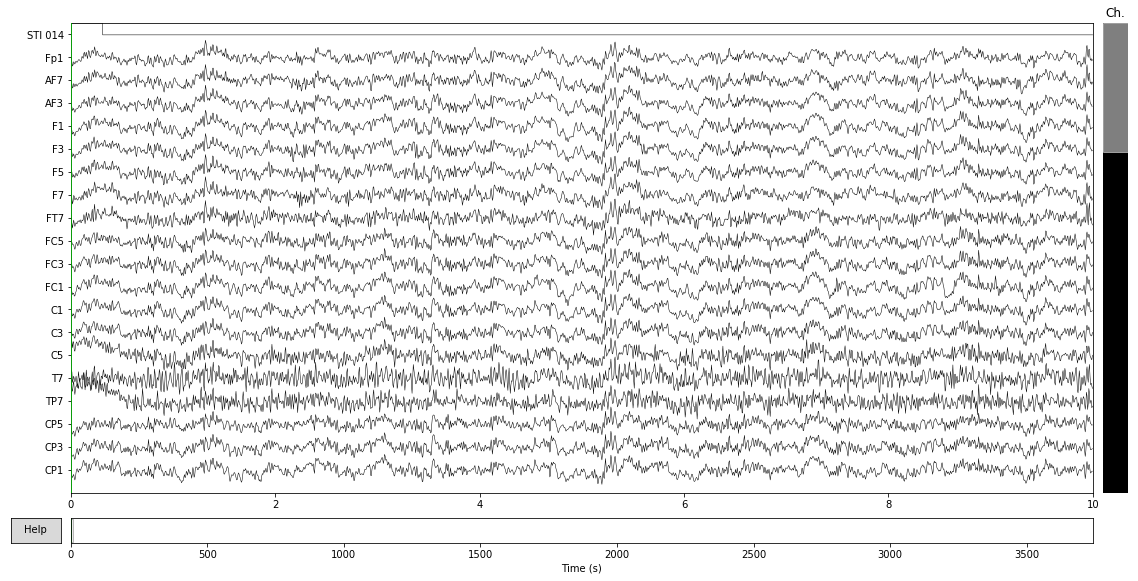

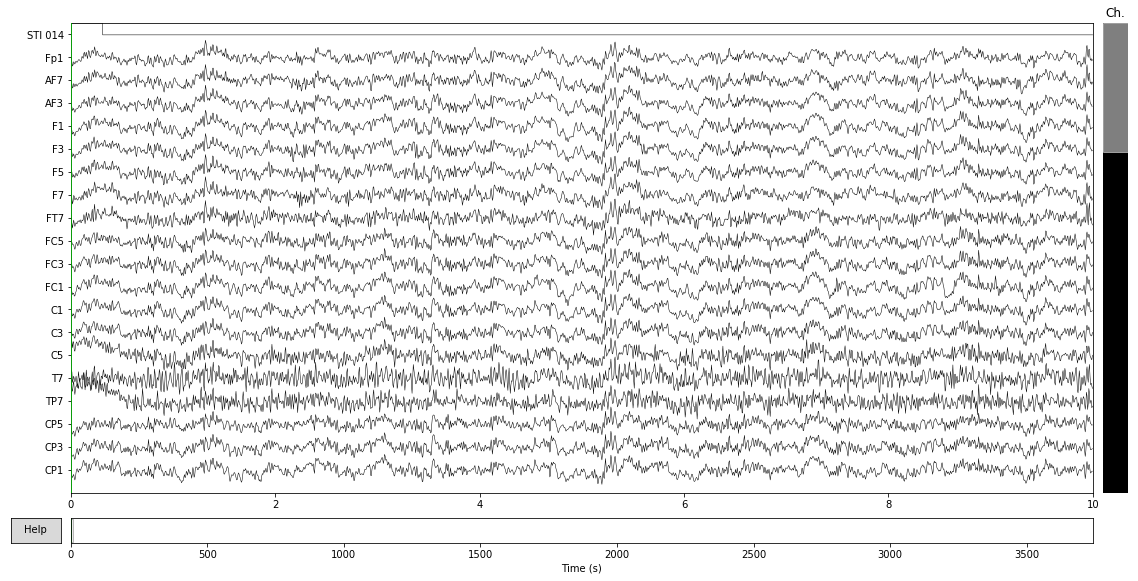

In [24]:
raw_fri=raw_fr.copy()
ica.apply(raw_fri)
raw_fri.plot()

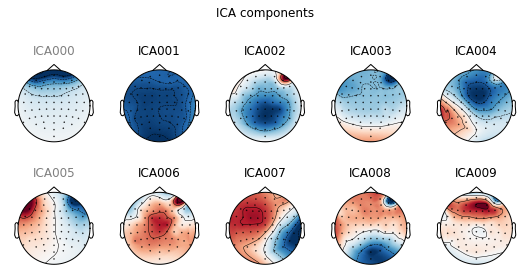

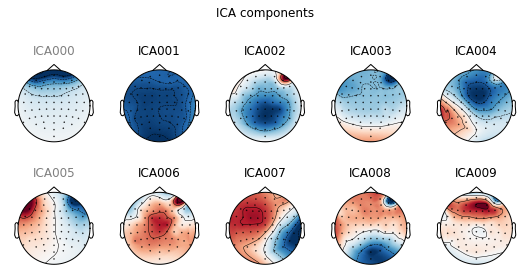

In [25]:
ica.plot_components(picks=range(10),inst=raw_fri)

# ECG artifacts

In [26]:
ecg_epochs_7=create_ecg_epochs(raw_fri,ch_name='EXG7')
ecg_inds,scores=ica.find_bads_ecg(ecg_epochs_7,ch_name='EXG7')

Using channel EXG7 to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz
Filter length of 8192 samples (16.000 sec) selected
Number of ECG events detected : 4140 (average pulse 66 / min.)
4140 matching events found
No baseline correction applied
Not setting metadata
Loading data for 4140 events and 513 original time points ...
0 bad epochs dropped


/data/backed_up/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


In [27]:
ecg_inds

[3]

In [28]:
ica.exclude.extend(ecg_inds)
ica.exclude

[5, 0, 3]

In [29]:
ica.apply(raw_fri)

Transforming to ICA space (25 components)
Zeroing out 3 ICA components


<RawEDF  |  kai-test-2.bdf, n_channels x n_times : 73 x 1915904 (3742.0 sec), ~1.04 GB, data loaded>

Transforming to ICA space (25 components)
Zeroing out 3 ICA components


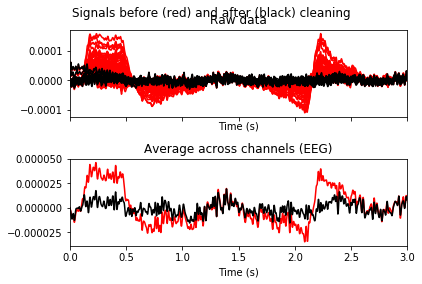

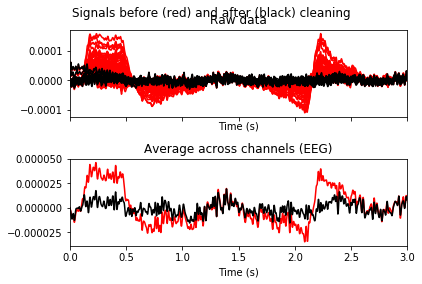

In [30]:
ica.plot_overlay(raw_fr,ica.exclude)

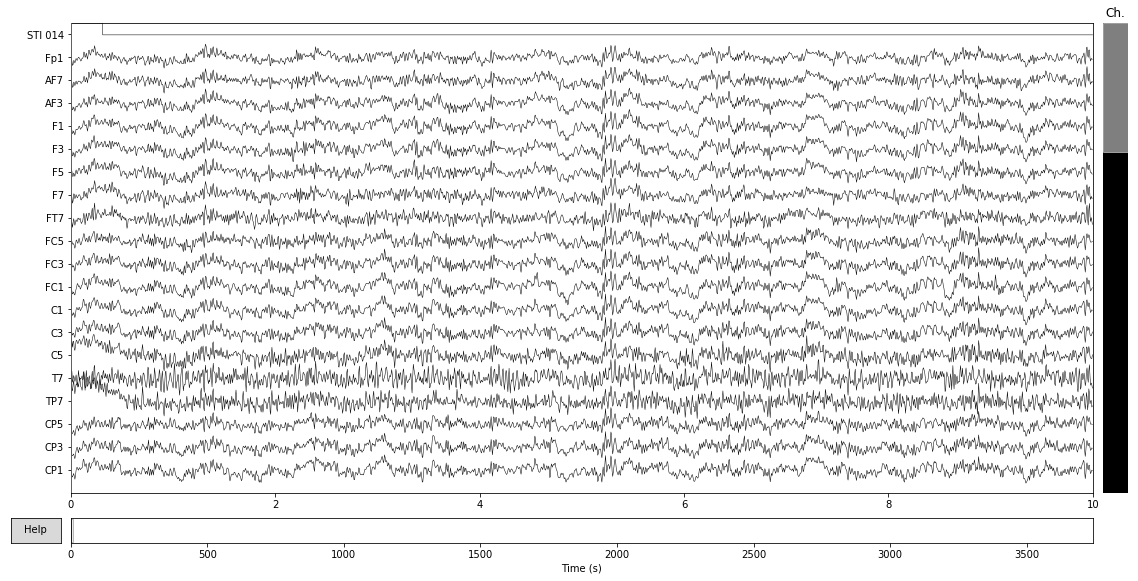

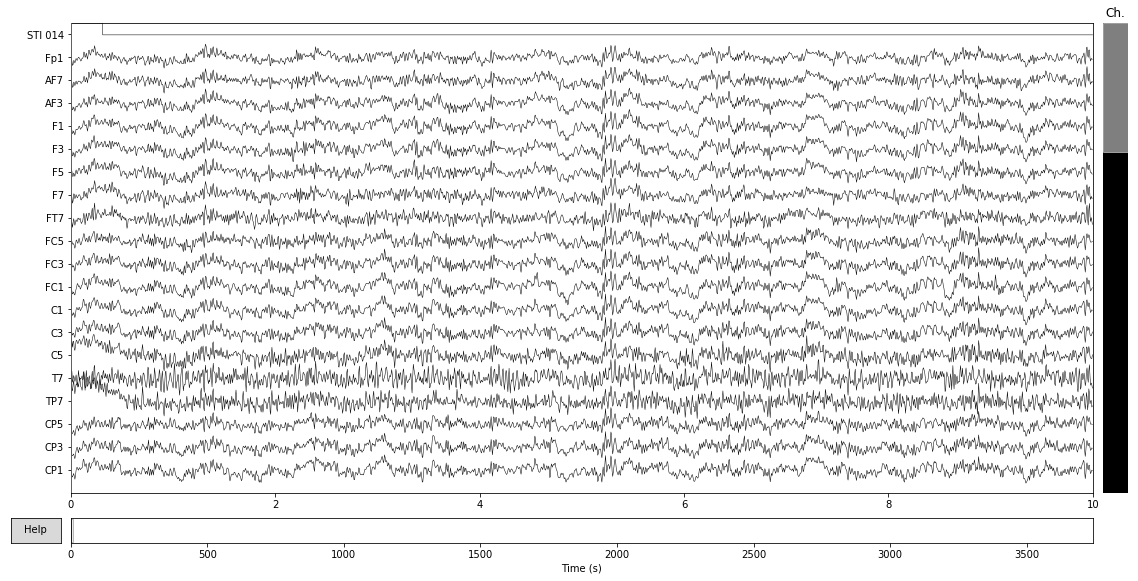

In [31]:
raw_fri.plot()

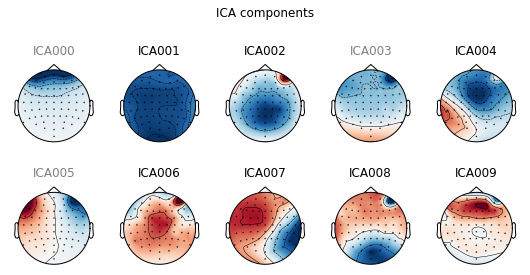

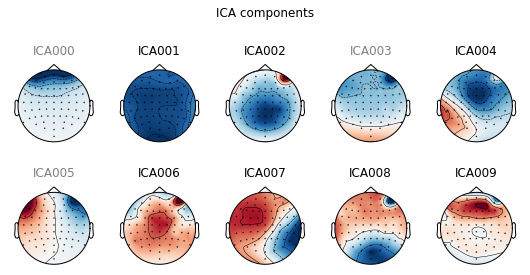

In [32]:
ica.plot_components(picks=range(10),inst=raw_fri)

# ICA to epoched data

In [86]:
#epochs_tar5.load_data()
#epochs_tar5.plot(block=True)

In [85]:
#epochs_tar5.set_montage(layout)
#ica_tar5 = ICA(n_components=25,random_state=25)
#ica_tar5.fit(epochs_tar5,picks=our_picks)

In [84]:
#eog_inds=[eog_inds3,eog_inds4,eog_inds5,eog_inds6]
#ica_tar5.exclude=[]
#for i in eog_inds:
 #   for ind in i:
  #      if ind not in ica_tar5.exclude:
   #         ica_tar5.exclude.extend([ind])

In [83]:
#ica_tar5.exclude

In [82]:
#epochs_tar5_i=epochs_tar5.copy()
#ica_tar5.apply(epochs_tar5_i)
#epochs_tar5_i.plot()

In [38]:
#TOMORROW: understand what the fit func is doing!
#ica_tar5.exclude.extend([0])
#ica_tar5.apply(epochs_tar5)

In [81]:
#ica_tar5.plot_components(picks=range(10),inst=epochs_tar5_i)

In [40]:
#ica_tar5.plot_sources(tar5_average,exclude=ica_tar5.exclude)

In [41]:
#tar5_average.plot(exclude=['EXG1',"EXG2","EXG3",'EXG4',"EXG5","EXG6","EXG7",'EXG8'])

In [80]:
#ica_tar5.plot_overlay(epochs_tar5.average(),exclude=ica_tar5.exclude)

# Looping through conditions and applying ICA to them

In [49]:
event_id = {'delay1trig':101,'probetrig':103,
            'target5trig':105,'target8trig':107,
            'dis5trig':109,'dis8trig':111,
            'neutraltrig':113,'ITItrig':115}

tmin, tmax = -0.5, 2  #dont remember the window, making this up
baseline = (None, 0.0)
epCond={}
for event in event_id.keys():
    thisID={event:event_id[event]}
    epCond[event]=mne.Epochs(raw_fr, events=events, event_id=thisID, tmin=tmin,
                    tmax=tmax)

99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
495 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
495 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
495 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [70]:
our_picks=mne.pick_types(raw_fr.info,meg=False,eeg=True,eog=False,exclude=['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'])
layout=mne.channels.read_montage('biosemi64')
raw_fr.set_montage(layout)
plottables={}
for cond in epCond.keys():
    thisEp=epCond[cond]
    thisEp_i=thisEp.copy()
    thisEp.load_data()
    thisEp_i.load_data()
    thisEp_i.set_montage(layout)
    icaCond=ICA(n_components=25,random_state=25)
    icaCond.fit(thisEp_i,picks=our_picks)
    icaCond.exclude=[0,3,5]
    icaCond.apply(thisEp_i)
    plottables[cond]=icaCond

The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-70-c516e5969fb2>:3: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
  raw_fr.set_montage(layout)
<ipython-input-70-c516e5969fb2>:10: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
  thisEp_i.set_montage(layout)


Selection by number: 25 components
Fitting ICA took 1.0s.
Transforming to ICA space (25 components)
Zeroing out 3 ICA components
The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-70-c516e5969fb2>:10: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
  thisEp_i.set_montage(layout)


Selection by number: 25 components
Fitting ICA took 1.3s.
Transforming to ICA space (25 components)
Zeroing out 3 ICA components
The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-70-c516e5969fb2>:10: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
  thisEp_i.set_montage(layout)


Selection by number: 25 components
Fitting ICA took 1.5s.
Transforming to ICA space (25 components)
Zeroing out 3 ICA components
The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-70-c516e5969fb2>:10: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
  thisEp_i.set_montage(layout)


Selection by number: 25 components
Fitting ICA took 6.0s.
Transforming to ICA space (25 components)
Zeroing out 3 ICA components
The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-70-c516e5969fb2>:10: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
  thisEp_i.set_montage(layout)


Selection by number: 25 components
Fitting ICA took 0.9s.
Transforming to ICA space (25 components)
Zeroing out 3 ICA components
The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-70-c516e5969fb2>:10: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
  thisEp_i.set_montage(layout)


Selection by number: 25 components
Fitting ICA took 0.8s.
Transforming to ICA space (25 components)
Zeroing out 3 ICA components
The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-70-c516e5969fb2>:10: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
  thisEp_i.set_montage(layout)


Selection by number: 25 components
Fitting ICA took 6.3s.
Transforming to ICA space (25 components)
Zeroing out 3 ICA components
The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-70-c516e5969fb2>:10: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'EXG1', u'EXG2', u'EXG3', u'EXG4', u'EXG5', u'EXG6', u'EXG7', u'EXG8']. Their position has been left untouched.
  thisEp_i.set_montage(layout)


Selection by number: 25 components
Fitting ICA took 4.9s.
Transforming to ICA space (25 components)
Zeroing out 3 ICA components


In [67]:
#event_id = {'delay1trig':101,'probetrig':103,
#            'target5trig':105,'target8trig':107,
 #           'dis5trig':109,'dis8trig':111,
  #          'neutraltrig':113,'ITItrig':115}
def plot_diff(epoch,ica):
    return ica.plot_overlay(epoch.average(),exclude=ica.exclude)

Transforming to ICA space (25 components)
Zeroing out 3 ICA components


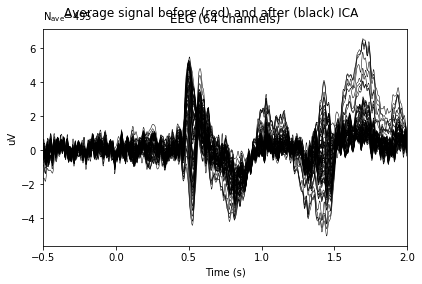

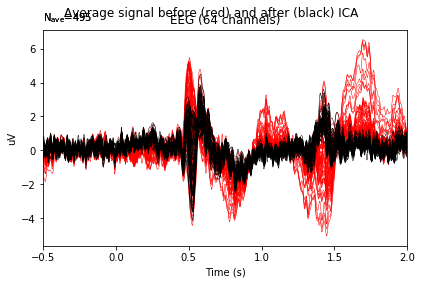

In [72]:
plot_diff(epCond['delay1trig'],plottables['delay1trig'])

Transforming to ICA space (25 components)
Zeroing out 3 ICA components


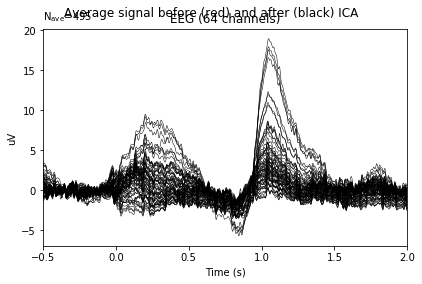

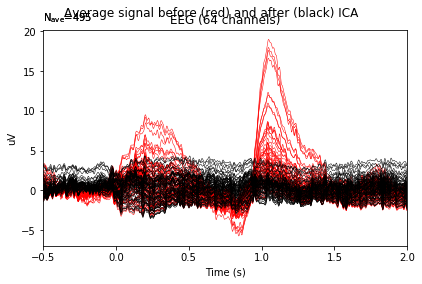

In [73]:
plot_diff(epCond['probetrig'],plottables['probetrig'])

Transforming to ICA space (25 components)
Zeroing out 3 ICA components


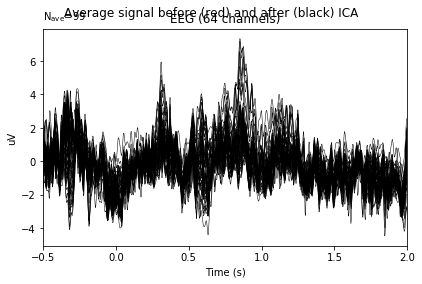

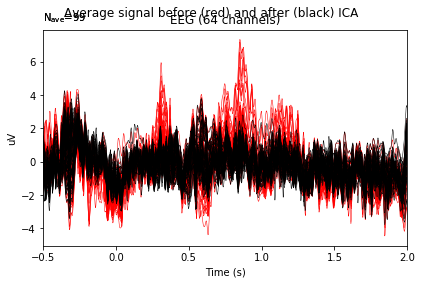

In [74]:
plot_diff(epCond['target5trig'],plottables['target5trig'])

Transforming to ICA space (25 components)
Zeroing out 3 ICA components


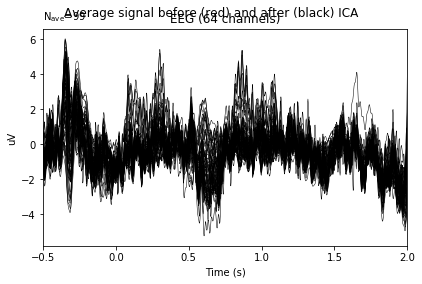

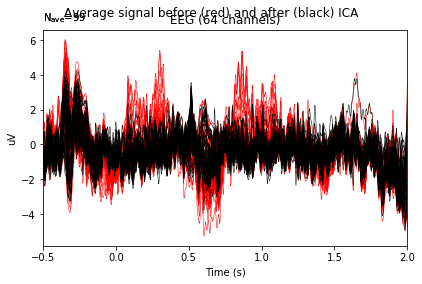

In [75]:
plot_diff(epCond['target8trig'],plottables['target8trig'])

Transforming to ICA space (25 components)
Zeroing out 3 ICA components


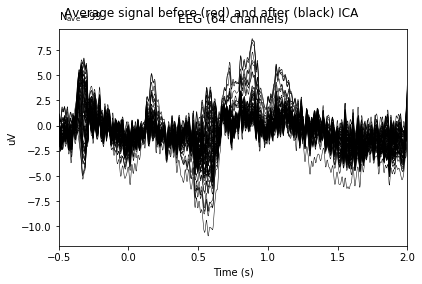

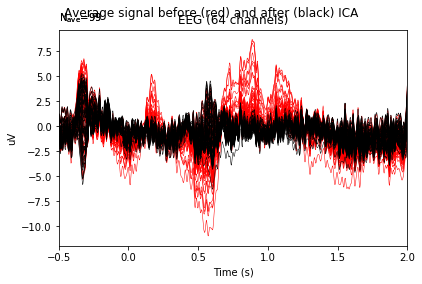

In [76]:
plot_diff(epCond['dis5trig'],plottables['dis5trig'])

Transforming to ICA space (25 components)
Zeroing out 3 ICA components


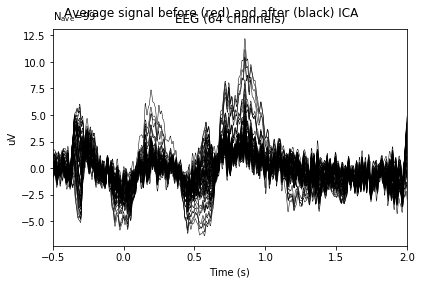

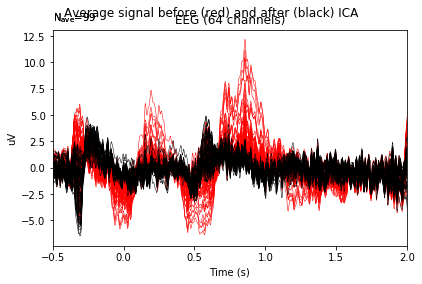

In [77]:
plot_diff(epCond['dis8trig'],plottables['dis8trig'])

Transforming to ICA space (25 components)
Zeroing out 3 ICA components


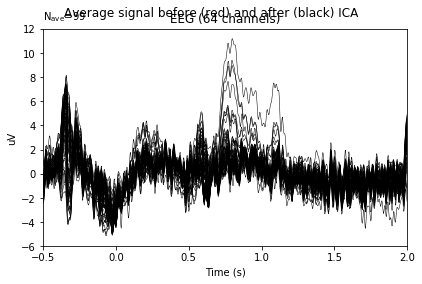

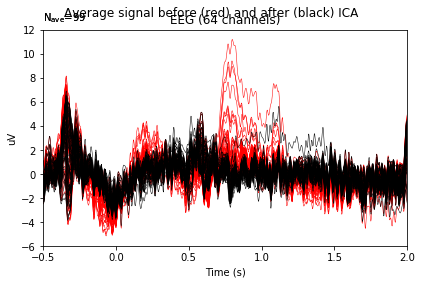

In [78]:
plot_diff(epCond['neutraltrig'],plottables['neutraltrig'])

Transforming to ICA space (25 components)
Zeroing out 3 ICA components


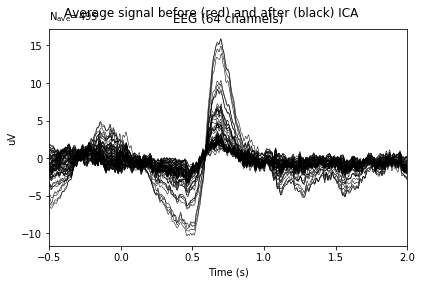

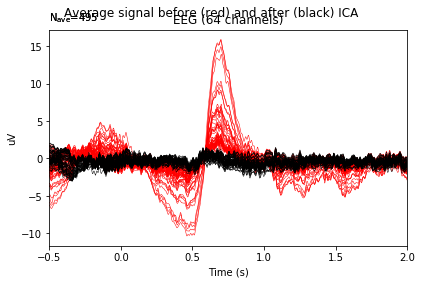

In [79]:
plot_diff(epCond['ITItrig'],plottables['ITItrig'])